In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
toydata3=pd.read_excel("E:/JM/agri prodcuts forecasting/downloaded/VegetablesandpulsesCSV/toy3.xlsx")
toydata3.head()

,Decade,Year,Commodity,EndUse,Commodityuse,Category,Item,Unit,price
0,1970's,1970,Asparagus,Canning,Asparagus-Canning,Season Average Price,Constant 2009 Dollars,$/cwt,1670.69
1,1970's,1971,Asparagus,Canning,Asparagus-Canning,Season Average Price,Constant 2009 Dollars,$/cwt,1748.46
2,1970's,1972,Asparagus,Canning,Asparagus-Canning,Season Average Price,Constant 2009 Dollars,$/cwt,1827.63
3,1970's,1973,Asparagus,Canning,Asparagus-Canning,Season Average Price,Constant 2009 Dollars,$/cwt,1843.28
4,1970's,1974,Asparagus,Canning,Asparagus-Canning,Season Average Price,Constant 2009 Dollars,$/cwt,1851.47


In [4]:
toydata3.shape

(2081, 9)

In [5]:
toydata3["Year"]=toydata3["Year"].astype(str)
# needed as we later manuever on these

In [6]:
toydata3reshape=pd.pivot_table(toydata3, values= 'price', index=['Commodityuse'], columns=['Year'], aggfunc=np.sum)
# note that some columns are automatically omitted now

In [7]:
toydata3reshape.shape # see how the shape changes

(49, 48)

In [8]:
for item in toydata3reshape.columns:
    toydata3reshape["logprice"+item]=np.log(toydata3reshape[item])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [9]:
loglist=toydata3reshape.columns[48:96]

In [10]:
yr=1971
for i in range(1, len(loglist)):
    
    toydata3reshape["growth"+str(yr)]=toydata3reshape[loglist[i]]-toydata3reshape[loglist[i-1]]
    yr=yr+1

In [11]:
toy3=toydata3reshape.dropna()

In [12]:
toy3.shape

(23, 143)

In [13]:
X=toy3.values[:,96:143]

In [14]:
np.any(np.isnan(X)) #later need to drop some veg, otherwise missing too many for NaN

False

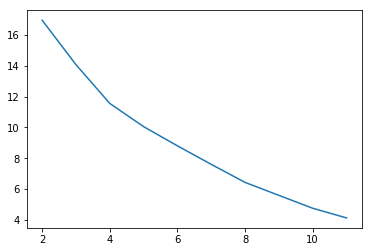

In [15]:
gr=[]
top=12
for k in range(2,top):
    clusternum=k
    k_means=KMeans(init="k-means++", n_clusters=clusternum, n_init=50)
    k_means.fit(X)
    err=k_means.inertia_
    gr.append(err)
plt.plot(np.arange(2, top), gr)
plt.show()

In [16]:
clusternum=4
k_means=KMeans(init="k-means++", n_clusters=clusternum, n_init=50)
k_means.fit(X)
label=k_means.labels_

In [17]:
toy3["grouplabel"]=label

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
toy3["grouplabel"]

Commodityuse
Broccoli-Fresh              3
Broccoli-Processing         3
Cabbage-Fresh               3
Cabbage-Processing          0
Carrots-Freezing            0
Carrots-Fresh               3
Cauliflower-Fresh           3
Cauliflower-Processing      2
Cucumbers-Fresh             3
Green Lima Beans-Canning    0
Green Peas-Canning          0
Green Peas-Freezing         0
Head Lettuce-Fresh          3
Onions-Fresh                1
Snap beans-Canning          0
Snap beans-Freezing         0
Snap beans-Fresh            3
Spinach-Fresh               3
Sweet Corn-Canning          0
Sweet Corn-Freezing         0
Sweet Corn-Fresh            3
Tomatoes-Fresh              3
Tomatoes-Processing         0
Name: grouplabel, dtype: int32